# Optional Imaging Lab

## EECS 16A: Designing Information Devices and Systems I, Fall 2020


## Table of Contents

* [Instructions](#instructions)
* [Introduction](#introduction)
* [Hardware Setup](#hardwareSetup)
* [Single Pixel Imaging](#singlePixel)
* [Multipixel Imaging](#multiPixel)
    * [Hadamard Matrix](#hadamard)
    * [Random Matrix](#random)


<a id='instructions'></a>
# <span style='color:blue'>Instructions</span>


* Complete this lab by running all the blocks and answering the question at the end marked with `"YOUR COMMENTS HERE"`. No coding is required!


* In case you run into difficulties, please request help by creating a ticket on the [lab queue](https://lab.eecs16a.org/). 


* This lab is ungraded and completely optional. There is no required checkoff. Instead, we request you to fill out this [feedback form](https://forms.gle/kXRSiumEGtHd7bD39) when you finish.

<a id='introduction'></a>
# <span style='color:blue'>Introduction</span>

This lab is an extension of Imaging Lab 2 and Imaging Lab 3 that demonstrates "real" imaging using the ambient light sensor circuit you developed in Imaging Lab 1 and your computer monitor (as opposed to the virtual simulations you have seen so far).

In a traditional in-person semester, we use the setup shown below. We image an index card by projecting masks onto the index card using a projector. Then, we use the ambient light sensor to detect the amount of light reflected by the masked index card.

<br/>
<center>
<table>
<tr>
<td width="500px" style="border: 1px solid #000000;"><center>Side View</center></td>
<td width="500px" style="border: 1px solid #000000;"><center>Top View</center></td>
</tr>
<tr>
<td style="border: 1px solid #000000;"><img src="images/side.png" style="width: 500px;"/></td>
<td style="border: 1px solid #000000;"><img src="images/top.png" style="width: 500px;"/></td>
</table>
</center>
<br>

In this lab, we use the setup shown below. We image a 32x32 picture (akin to an index card) by overlaying masks onto the picture using Python code and displaying the result on the screen. Then, we use the ambient light sensor to detect the amount of light reflected by the masked picture.

<br/>
<center>
<table>
<tr>
<td width="500px" style="border: 1px solid #000000;"><center>Side View</center></td>
<td width="500px" style="border: 1px solid #000000;"><center>Top View</center></td>
</tr>
<tr>
<td style="border: 1px solid #000000;"><img src="images/side_screen.png" style="width: 500px;"/></td>
<td style="border: 1px solid #000000;"><img src="images/top_screen.png" style="width: 500px;"/></td>
</table>
</center>
<br>



**<span style = "color: red">Run the following code block to get access to several pre-written functions and helper libraries.</span>**

In [1]:
%run scripts/helpers.py
%matplotlib inline

<a id='hardwareSetup'></a>
# <span style="color:blue">Hardware Setup</span>

Please follow the instructions [here](https://docs.google.com/document/d/1qEMy6iSU7u73d7S0fvz_TE4xctNfTcPqz9Lx7x-hExk/edit?usp=sharing). 



<a id='singlePixel'></a>
## <span style="color:blue">Real Single Pixel Imaging</span>

When dealing with a complicated system, it is often useful to perform a "sanity check" to make sure that a simpler subset of the system is working as expected, before adding more complexity. Let's make sure that single pixel imaging from Imaging Lab 2 works. 

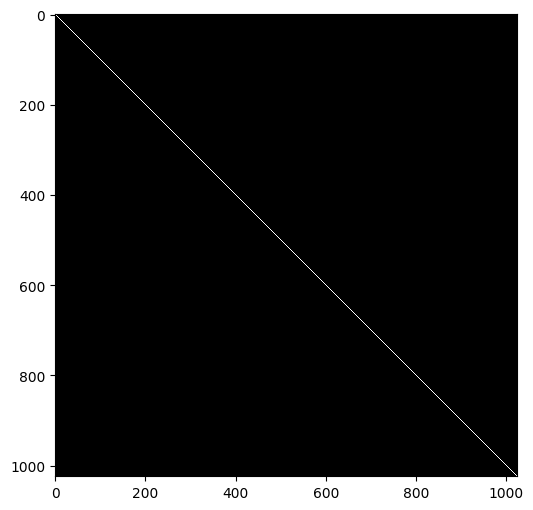

In [2]:
# Create `HSingle` to scan a 32x32 image. `HSingle` is the identity matrix.
HSingle = np.eye(32 * 32)

plt.figure(figsize=(6, 6))
plt.imshow(HSingle, cmap="gray", interpolation="nearest")
np.save("HSingle.npy", HSingle)

Now, let's load in a picture/image to display. You can load in our image, or upload you own.  The image you upload must be black and white and 32x32 pixels in size.  If you'd like to draw your own pixel art and upload it, you can try [this site](https://www.pixilart.com/draw).  When you're done drawing your image, download it as a .png file. Simple images with white backgrounds work best!

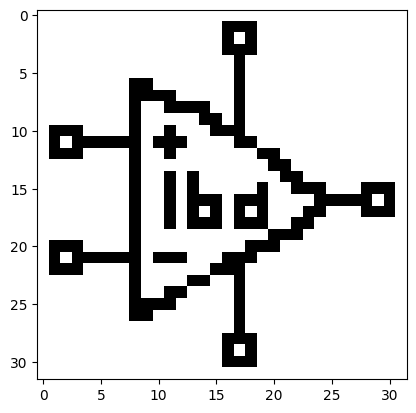

In [3]:
# Load in and plot your desired picture.
filename = "data/img_16a_32_32.png"
im = mpimg.imread(filename).astype("float32")[:, :, 0]

plt.imshow(im, cmap="gray")

Here's a function that will take your H matrix and digitally project it onto your image (slice by slice). This will output a matrix which we will then save and use to display on the computer monitor.  

In [4]:
def project_H_onto_image(H, img, sz):
    H_new = np.zeros_like(H)
    for i in range(sz * sz):
        mask = np.reshape(H[i, :], (sz, sz))
        curr_scan = np.multiply(
            img, mask
        )  # Perform a scan using element wise multiplication

        H_new[i, :] = np.reshape(curr_scan, (sz * sz))
    return H_new

In [5]:
masked_image_identity = project_H_onto_image(HSingle, im, 32)

In [6]:
masked_image_identity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [7]:
np.save("saved_data/mask_identity.npy", masked_image_identity)
np.save("saved_data/Hsingle.npy", HSingle)

**<span style="color:red">Double check that you've done the following before proceeding:</span>**

* Upload `AnalogReadSerial` to the Launchpad.

* Close the Energia Serial Monitor.

* Make sure that the ambient light sensor is aimed at the the bottom right corner of your laptop or screen! Its legs should not be touching.


### Check again that you have closed the Energia Serial Monitor. You will not be able to scan otherwise.

**<span style="color:red">You will then run the `capture_image.py` script from the following code block that projects mask patterns from $H_{Single}$ onto your image.</span>** 

When running **`capture_image.py`**, a new icon shaped like a white web will appear in the taskbar. The window depicting our masks will appear on the projector's screen.

Before scanning, you will be prompted to specify the **COM port used by the Launchpad and the display associated with the screen.** 

**Select the COM port associated with UART1 (previously accessed in the Energia Serial Monitor and found using the Device Manager) and the screen that has your light sensor in front of it.** Note that you want to specify the index of your choice i.e. for `2) 1280 x 720`, specify 2.  If you have multiple screens, you can use trial and error to find that right one (an icon will appear on the screen you select) **<span style="color:red">Make sure that you've selected the correct COM port!</span>**

`capture_image.py` iterates over the rows of the $H$ matrix you made. These rows are translated, one-by-one, into real masks projected onto the screen. Light sensor readings are taken for each mask. At the start of the scan, you'll see a series of `Loc: # Data: #` printed to the output below. `Loc` corresponds to the index $k$ of the current sensor reading (and likewise current row of H). `Data` corresponds to the actual digitized value obtained from the light sensor. This "debug" information is printed consecutively for the first few/last few sensor outputs. Otherwise, this info is printed when `k % 100 = 0` (every 100 scans). 

Don't worry about messages like `Time delta between captures in s: #`. This is printed a lot because the lab computers are kind of slow. 

The whole scanning process should take roughly 3 minutes. 

*Note: On the topic of non-idealities, our scans take so long because:*
* We average sensor readings to improve the signal-to-noise ratio. Therefore we need to read more times.
* As you'll learn in Module 2, capacitors take some time to charge and discharge. A capacitor acts as a "low-pass filter." We used a 0.1$\mu$F capacitor in our sensing circuit to "smooth" the output and suppress "high-frequency" noise. In order to give the capacitor time to "settle" (i.e. ~fully charge/discharge), we need to wait longer between scans. Otherwise, the sensor reading will also include some "memory" of the previous scan result, when we really want the reading to only be about the current scan. 

**<span style="color:red">Not getting a good picture?</span>**

If you selected the incorrect COM port, a lot more "debug" lines will be dumped. You might notice `Data: -1` or `Losing data! Consider increasing your timeout!` messages. Once you see these messages, **stop** the scan, **save** your Jupyter notebook, then **close the Jupyter notebook in your Terminal (Ctrl+C twice) and re-open it**. You'll lose any saved variables (not output images), but everything you need has been saved to a file. Rerun the following code block again, but **make sure you select the right COM port**. 

In [8]:
%run scripts/helpers.py
%matplotlib inline

%run capture_image.py --mask saved_data/mask_identity.npy --out saved_data/sensor_readingsHSingle --width 32 --height 32


EE16A Imaging Lab

Serial timeout in ms: 150
Sleep time in ms: 120
Projector brightness scale in percent: 100
FPS: 40
Image width: 32
Image height: 32
Mask file: saved_data/mask_identity.npy 

Checking serial connections...
Available serial ports:
1) /dev/tty.Bluetooth-Incoming-Port


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

<Figure size 640x480 with 0 Axes>

**<span style="color:red">Let's recreate the image from the sensor readings obtained with `HSingle`. DO NOT move on until you see your expected image (will be noisy, that's ok).</span>**

**<span style="color:red">Image too light/dark?</span>**  Try limiting light in your room or on your setup.  One trick is to cover the screen and light sensor with a hoodie or blanket to limit outside light (make sure the breadboard doesn't fall when you do this!).  Another way is to wait until night time and turn off all of the lights.

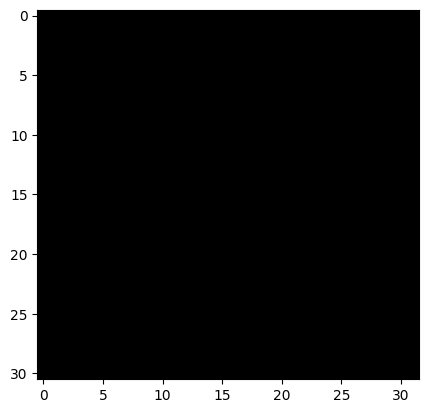

In [9]:
# Sensor readings
sr = np.load("saved_data/sensor_readingsHSingle_100_0.npy")
HSingle = np.load("saved_data/Hsingle.npy")

# Recreate the image vector from `HSingle` and `sr`
# Because `HSingle` is a special matrix, technically you do not need to perform any matrix operations
iv = sr

img = np.resize(iv, (32, 32))
plt.imshow(img[:-1], cmap="gray", interpolation="nearest")

<a id='multiPixel'></a>
## <span style = "color: blue">Real Multipixel Imaging</span></a>

In the previous section, we scanned our image one pixel at a time. Now, we are going to use two matrices you examined earlier in Imaging Lab 3 for scanning. Run the following blocks to scan your image with the Hadamard matrix and a random matrix.

### <a id ='hadamard'><span style = "color: blue">Hadamard Matrix</span></a>

In [10]:
# Inputs
#  `shape`: 2-element array. shape[0] = # of rows; shape[1] = # of columns
# Outputs
#  `H`: 2D Hadamard matrix (Hadamard)
def createHadamardMatrix(shape, plot=True):
    from scipy.linalg import hadamard

    # Hadamard matrix with +1, -1 entries
    # Note that the matrix order should be 2^r
    H = hadamard(shape[0])
    # Needs to be binary
    H = (H + 1) / 2

    if plot:
        plt.imshow(H, cmap="gray", interpolation="nearest")
        plt.title("Hadamard Matrix :)")
    return H;

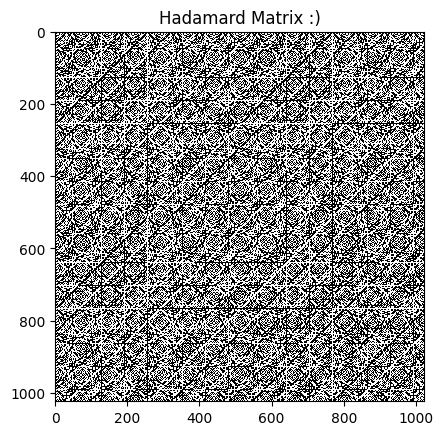

In [11]:
sz = 32
hadamardH = createHadamardMatrix((sz * sz, sz * sz))

In [12]:
masked_image_hadamard = project_H_onto_image(hadamardH, im, 32)
np.save("saved_data/mask_hadamard.npy", masked_image_hadamard)
np.save("saved_data/hadamardH.npy", hadamardH)

In [13]:
%run scripts/helpers.py
%matplotlib inline

# Run scan
%run capture_image.py --mask saved_data/mask_hadamard.npy --out saved_data/sensor_readingsHhadamard3 --width 32 --height 32


EE16A Imaging Lab

Serial timeout in ms: 150
Sleep time in ms: 120
Projector brightness scale in percent: 100
FPS: 40
Image width: 32
Image height: 32
Mask file: saved_data/mask_hadamard.npy 

Checking serial connections...
Available serial ports:
1) /dev/tty.Bluetooth-Incoming-Port


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

<Figure size 640x480 with 0 Axes>

**<span style="color:red">Let's reconstruct your image. Based off of your simulation results, is this the reconstruction quality that you expected using `randomH`?</span>**

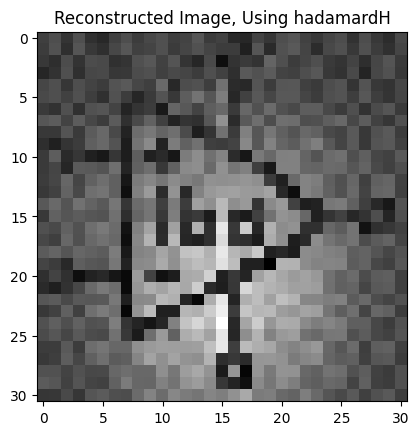

In [14]:
sr = np.load("saved_data/sensor_readingsHhadamard3_100_0.npy")
idealReconstruction(
    H=hadamardH, matrixName="hadamardH", s=sr, realImaging=False, X=sz, Y=sz
)

### <a id ='random'><span style = "color: blue">Random Matrix</span></a>

Now let's try using a random H matrix.  Do you think the random H will work better or worse?


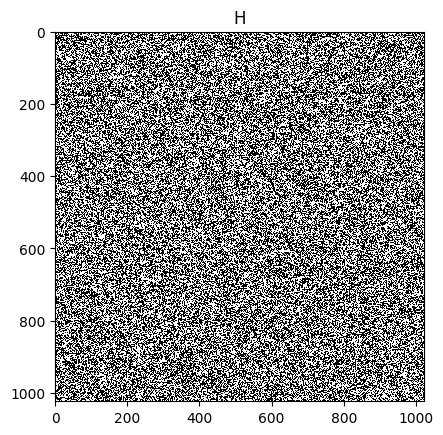

In [15]:
sz = 32
randomH = generateRandomBinaryMask(500, X=32, Y=32)

In [16]:
masked_image_random = project_H_onto_image(randomH, im, 32)
np.save("saved_data/mask_random.npy", masked_image_random)
np.save("saved_data/randomH.npy", randomH)

In [17]:
%run scripts/helpers.py
%matplotlib inline

# Run scan
%run capture_image.py --mask saved_data/mask_random.npy --out saved_data/sensor_readingsHrandom --width 32 --height 32


EE16A Imaging Lab

Serial timeout in ms: 150
Sleep time in ms: 120
Projector brightness scale in percent: 100
FPS: 40
Image width: 32
Image height: 32
Mask file: saved_data/mask_random.npy 

Checking serial connections...
Available serial ports:
1) /dev/tty.Bluetooth-Incoming-Port


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

<Figure size 640x480 with 0 Axes>

**<span style="color:red">Let's reconstruct your image. Based off of your simulation results, is this the reconstruction quality that you expected using `randomH`?</span>**

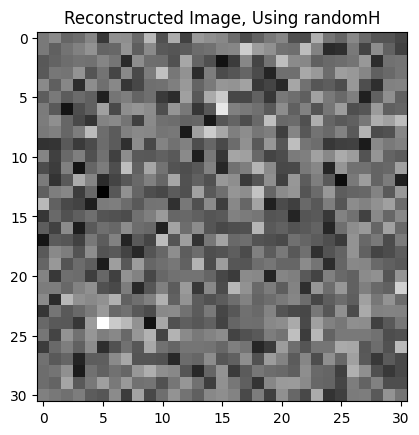

In [18]:
sr = np.load("saved_data/sensor_readingsHrandom_100_0.npy")
idealReconstruction(H=hadamardH, matrixName="randomH", s=sr, X=sz, Y=sz)

**<span style="color:red">Comment on your reconstruction results when using `randomH` and `hadamardH`. In real imaging, which matrix did better? Did this match your expectations from simulation? Why? Did multipixel imaging do better or worse than single pixel imaging?  Why?</span>**

`YOUR COMMENTS HERE`